# **Dataset categories and paths**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import json
import os

In [3]:
home_path = '/home/usuario/'

datasets_path = os.path.join(home_path, 'project_data', 'datasets')

all_datasets = ['SynthCars', 'SynthCarsPersons', 'Synth20', 'Synth20others', 'KITTITrackletsCars', 'KITTITrackletsCarsPersons', 'KITTITrackletsCarsHard', 'KITTITrackletsCarsPersonsHard']

Utils to fix the json meta files. Convert to array.

In [4]:
def to_arr(value):
    """ Converts a string with float values to an actual list of floats """
    return [float(name) for name in value.split()]

def fix_meta(meta):
    """ Converts all the string coded values to lists """
    meta['start_position'] = to_arr(meta['start_position'])
    meta['end_position'] = to_arr(meta['end_position'])
    meta['translation'] = to_arr(meta['translation'])

Util to plot positions.

In [5]:
def plot_points(values):
    positions_s = {'x':[], 'y':[]}
    for obs in values:
        positions_s['x'].append(obs['start_position'][0])
        positions_s['y'].append(obs['start_position'][1])
    positions_e = {'x':[], 'y':[]}
    for obs in values:
        positions_e['x'].append(obs['end_position'][0])
        positions_e['y'].append(obs['end_position'][1])

    plt.scatter(positions_s['x'], positions_s['y'])
    plt.scatter(positions_e['x'], positions_e['y'])

### **Synth20**

In [138]:
# Create dataset path
dataset_path = os.path.join(datasets_path, all_datasets[2]) 
# Loads all jsons and stores them in a list(container)
container = list()
for i in range(10000):
    # Create path and load file
    file_path = os.path.join(dataset_path, "meta", str(i).zfill(8)+'.json')
    with open(file_path) as json_file: meta_dict = json.load(json_file)
    # Convert the string to lists
    fix_meta(meta_dict)
    # Append to file
    container.append(meta_dict)

In [122]:
container[0]

{'start_position': [40.595827528161635, 16.278830422759373, 0.0],
 'start_angle': 1.363904103875634,
 'end_position': [40.655696691580815, 16.32681167069879, 0.0],
 'end_angle': 2.3404527755530573,
 'translation': [0.05986916341917872, 0.047981247939414294, 0.0],
 'rel_angle': 0.9765486716774232,
 'version': 0.1,
 'seed': 783495435,
 'mesh_id': 14,
 'mesh_scale': 3.6200196630821204,
 'cat': 'door'}

Create a list with all the different categories and a dictionary with metas sliced by categories.

In [123]:
categories = list()
for meta in container:
    if meta['cat'] not in categories:
        categories.append(meta['cat'])
metas = {cat: [] for cat in categories}
for meta in container:
    metas[meta['cat']].append(meta)

Plotting all the positions

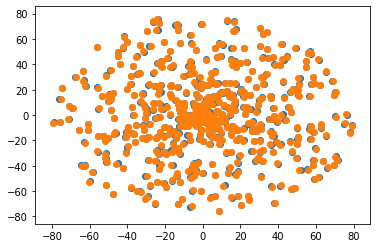

In [129]:
plot_points(metas['bookshelf'])

Dictionary with metas sliced by category (bookshelf in this case)

In [136]:
mesh_ids = []
for meta in metas['bookshelf']:
    if meta['mesh_id'] not in mesh_ids:
        mesh_ids.append(meta['mesh_id'])
metas_bookshelf = {idn: [] for idn in mesh_ids}
for meta in metas['bookshelf']:
    metas_bookshelf[meta['mesh_id']].append(meta)

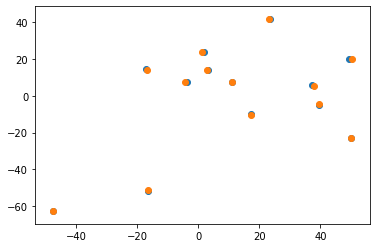

In [137]:
plot_points(metas_bookshelf[4])

## **SynthCars** 

In [157]:
# Create dataset path
dataset_path = os.path.join(datasets_path, all_datasets[0]) 
# Loads all jsons and stores them in a list(container)
container = list()
for i in range(10000):
    # Create path and load file
    file_path = os.path.join(dataset_path, "meta", str(i).zfill(8)+'.json')
    with open(file_path) as json_file: meta_dict = json.load(json_file)
    # Convert the string to lists
    fix_meta(meta_dict)
    # Append to file
    container.append(meta_dict)

In [158]:
container[0]

{'start_position': [51.15659718484961, 24.227100981353896, 0.0],
 'start_angle': 0.6119909877996736,
 'end_position': [51.385566834654234, 24.346957476159012, 0.0],
 'end_angle': -0.21235073962237871,
 'translation': [0.22896964980462442, 0.11985649480511791, 0.0],
 'rel_angle': -0.8243417274220524,
 'version': 0.1,
 'seed': 783495435,
 'mesh_id': 4,
 'mesh_scale': 3.2922082489765745}

Create a list with all the different categories and a dictionary with metas sliced by categories.

In [159]:
categories = list()
for meta in container:
    if meta['mesh_id'] not in categories:
        categories.append(meta['mesh_id'])
metas = {cat: [] for cat in categories}
for meta in container:
    metas[meta['mesh_id']].append(meta)

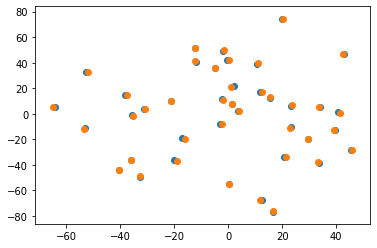

In [162]:
plot_points(metas[72])

## **KITTITrackletsCars**

In [6]:
# Create dataset path
dataset_path = os.path.join(datasets_path, all_datasets[4]) 
# Loads all jsons and stores them in a list(container)
container = list()
for i in range(10000):
    # Create path and load file
    file_path = os.path.join(dataset_path, "meta", str(i).zfill(8)+'.json')
    with open(file_path) as json_file: meta_dict = json.load(json_file)
    # Convert the string to lists
    fix_meta(meta_dict)
    # Append to file
    container.append(meta_dict)

In [221]:
container[0]

{'start_position': [13.410494804382324,
  4.552283763885498,
  -0.8585230112075806],
 'start_angle': -2.115488052368164,
 'end_position': [13.581085205078125, 4.6509552001953125, -0.76677405834198],
 'end_angle': -2.121565103530884,
 'translation': [0.17059040069580078, 0.09867143630981445, 0.0],
 'rel_angle': -0.0060770511627197266,
 'class': 'Van',
 'truncated': 0,
 'occluded': 0,
 'seq': 0,
 'frames': [0, 1],
 'trackids': [0, 0],
 'vo1': '1.000000000000000000e+00 0.000000000000000000e+00 0.000000000000000000e+00 0.000000000000000000e+00\n0.000000000000000000e+00 1.000000000000000000e+00 0.000000000000000000e+00 0.000000000000000000e+00\n0.000000000000000000e+00 0.000000000000000000e+00 1.000000000000000000e+00 0.000000000000000000e+00\n0.000000000000000000e+00 0.000000000000000000e+00 0.000000000000000000e+00 1.000000000000000000e+00\n',
 'vo2': '9.998790025711059570e-01 -1.499269995838403702e-02 4.208220168948173523e-03 3.520689904689788818e-01\n1.499260030686855316e-02 9.998880028

In [32]:
seqs = list(set(meta['seq'] for meta in container)) 

metas = {seq: [] for seq in seqs}
for meta in container: 
    metas[meta['seq']].append(meta)

In [48]:
metas_ids

{0: [],
 3: [],
 4: [],
 5: [],
 6: [],
 7: [],
 8: [],
 9: [],
 10: [],
 11: [],
 12: [],
 14: []}

In [68]:
big_cont = dict()
for seq_id in metas.keys():
    curr_meta = metas[seq_id]
    track_ids = list(set(meta['trackids'][0] for meta in curr_meta)) 

    metas_ids = {idn: [] for idn in track_ids}
    for meta in curr_meta: 
        metas_ids[meta['trackids'][0]].append(meta)
    
    big_cont[seq_id] = metas_ids

In [73]:
big_cont[3].keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8])

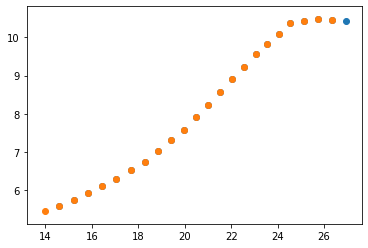

In [65]:
plot_points(metas_ids[12])

## **KITTITrackletsCarsPersons**

In [177]:
# Create dataset path
dataset_path = os.path.join(datasets_path, all_datasets[4]) 
# Loads all jsons and stores them in a list(container)
container = list()
for i in range(10000):
    # Create path and load file
    file_path = os.path.join(dataset_path, "meta", str(i).zfill(8)+'.json')
    with open(file_path) as json_file: meta_dict = json.load(json_file)
    # Convert the string to lists
    fix_meta(meta_dict)
    # Append to file
    container.append(meta_dict)

In [184]:
container[0]

{'start_position': [28.837316513061523, 5.591495990753174, -1.164704978466034],
 'start_angle': 1.5856159925460815,
 'end_position': [27.60926055908203, 5.584776878356934, -1.164845049381256],
 'end_angle': 1.591284990310669,
 'translation': [-1.2280559539794922, -0.006719112396240234, 0.0],
 'rel_angle': 0.005668997764587402,
 'class': 'Car',
 'truncated': 0,
 'occluded': 1,
 'seq': 1,
 'frames': [82, 83],
 'trackids': [29, 29],
 'vo1': '9.995489716529846191e-01 -2.880069985985755920e-02 8.510819636285305023e-03 9.348470306396484375e+01\n2.854770049452781677e-02 9.991869926452636719e-01 2.848229929804801941e-02 4.078310132026672363e-01\n-9.324209764599800110e-03 -2.822650037705898285e-02 9.995579719543457031e-01 -8.071969747543334961e-01\n-2.222609953732751801e-16 -4.921699829272138075e-18 6.893209856049266920e-19 1.000000000000000000e+00\n',
 'vo2': '9.995279908180236816e-01 -2.910429984331130981e-02 9.799329563975334167e-03 9.466310119628906250e+01\n2.883859910070896149e-02 9.992390